Q1. Implement logistic regression on the Iris dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (using all features): 0.97
Classification Report (Full Features):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



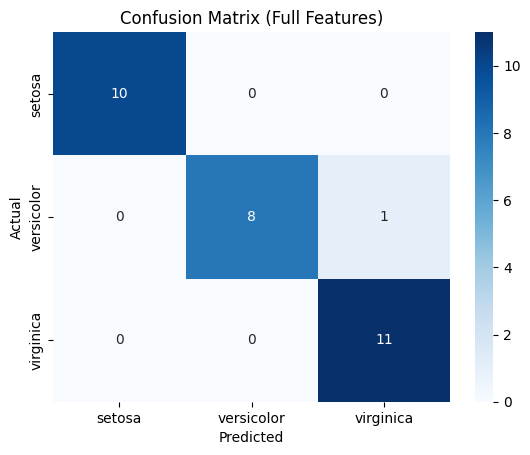

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy (using 2 features): 0.93
Classification Report (2 Features):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



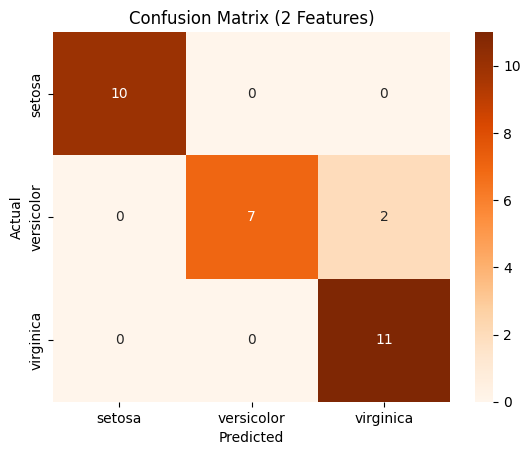

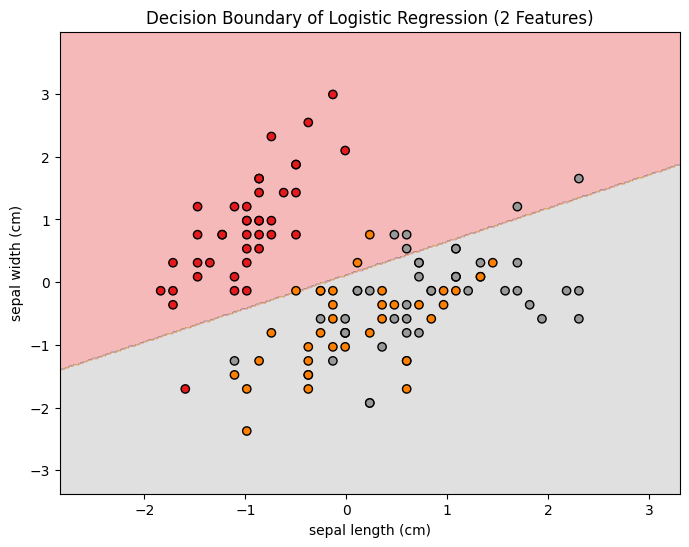

In [6]:
# Load Iris dataset
iris = load_iris()

# ----- FULL FEATURE MODEL (All 4 features) -----
X_full = iris.data
y = iris.target

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.2, random_state=42)

scaler_full = StandardScaler()
X_train_full = scaler_full.fit_transform(X_train_full)
X_test_full = scaler_full.transform(X_test_full)

model_full = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model_full.fit(X_train_full, y_train_full)

y_pred_full = model_full.predict(X_test_full)

accuracy_full = accuracy_score(y_test_full, y_pred_full)
print(f"Accuracy (using all features): {accuracy_full:.2f}")
print("Classification Report (Full Features):\n", classification_report(y_test_full, y_pred_full))

conf_matrix_full = confusion_matrix(y_test_full, y_pred_full)
sns.heatmap(conf_matrix_full, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Full Features)")
plt.show()


# ----- TWO FEATURE MODEL (for Decision Boundary Visualization) -----
X_two = iris.data[:, :2]  # Only first two features
y = iris.target

X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y, test_size=0.2, random_state=42)

scaler_two = StandardScaler()
X_train_two = scaler_two.fit_transform(X_train_two)
X_test_two = scaler_two.transform(X_test_two)

model_two = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model_two.fit(X_train_two, y_train_two)

y_pred_two = model_two.predict(X_test_two)

accuracy_two = accuracy_score(y_test_two, y_pred_two)
print(f"\nAccuracy (using 2 features): {accuracy_two:.2f}")
print("Classification Report (2 Features):\n", classification_report(y_test_two, y_pred_two))

conf_matrix_two = confusion_matrix(y_test_two, y_pred_two)
sns.heatmap(conf_matrix_two, annot=True, cmap="Oranges", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (2 Features)")
plt.show()


# ----- Decision Boundary Function -----
def plot_decision_boundary(X, y, model, scaler, feature_names):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

    input_features = np.c_[xx.ravel(), yy.ravel()]
    input_features_scaled = scaler.transform(input_features)
    Z = model.predict(input_features_scaled)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Decision Boundary of Logistic Regression (2 Features)")
    plt.show()

# Plot Decision Boundary
plot_decision_boundary(X_train_two, y_train_two, model_two, scaler_two, iris.feature_names[:2])